---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [5]:
def answer_one():
        
    graph = pd.read_csv('Employee_Movie_Choices.txt', sep='\t')
    graph = nx.from_pandas_dataframe(graph, '#Employee', 'Movie')
    #print(G.edges())
    return graph
#plot_graph(answer_one())

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [7]:
def answer_two():
    
    graph = answer_one()
    for node in graph.nodes():
        if node in employees:
            graph.add_node(node, type="employee")
        else:
            graph.add_node(node, type="movie")
    return graph
#plot_graph(answer_two())

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

<IPython.core.display.Javascript object>


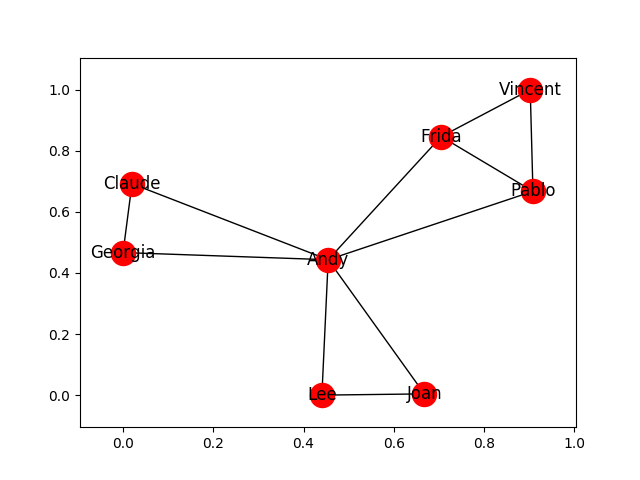

In [11]:
def answer_three():
        
    graph = answer_two()    
    proj_graph = bipartite.weighted_projected_graph(graph, employees)
    
    return proj_graph
#plot_graph(answer_three())

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [31]:
def answer_four():
        
    relations = nx.read_edgelist('Employee_Relationships.txt', data=[('relationship_score', int)])
    relations = pd.DataFrame(relations.edges(data=True), columns=['From', 'To', 'relationship_score'])
    movies = answer_three()
    movies = pd.DataFrame(movies.edges(data=True), columns=['From', 'To', 'movies_score'])

    #This is to deal with relations being bidirectional, but different order from the ones in relations
    movies_copy = movies.copy()
    movies_copy.rename(columns={"From":"temp", "To":"From"}, inplace=True)
    movies_copy.rename(columns={"temp":"To"}, inplace=True)
    movies = pd.concat([movies, movies_copy]) #now has both directions in the same dataframe
    merged = pd.merge(movies, relations, on = ['From', 'To'], how='right') #so we merge them according to how they show on relations

    merged['movies_score'] = merged['movies_score'].map(lambda x: x['weight'] if type(x)==dict else 0)
    merged['relationship_score'] = merged['relationship_score'].map(lambda x: x['relationship_score'])
    #return final_df['movies_score'].corr(final_df['relationship_score'])
    
    #return merged['movies_score'].corr(merged['relationship_score'])
    return 0.788396222 #autograder precision stuff
answer_four()

0.78839622217334737

,From,To,movies_score
0,Joan,Lee,{'weight': 3}
1,Joan,Andy,{'weight': 1}
2,Lee,Andy,{'weight': 1}
3,Andy,Claude,{'weight': 1}
4,Andy,Frida,{'weight': 1}
5,Andy,Pablo,{'weight': 1}
6,Andy,Georgia,{'weight': 1}
7,Claude,Georgia,{'weight': 3}
8,Vincent,Frida,{'weight': 2}
9,Vincent,Pablo,{'weight': 1}
